In [1]:
!pip install prophet

In [2]:
from prophet import Prophet
import pandas as pd
import numpy as np
import missingno as msn
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/data.csv")
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
df["date"]=pd.to_datetime(df["date"])

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

<Axes: >

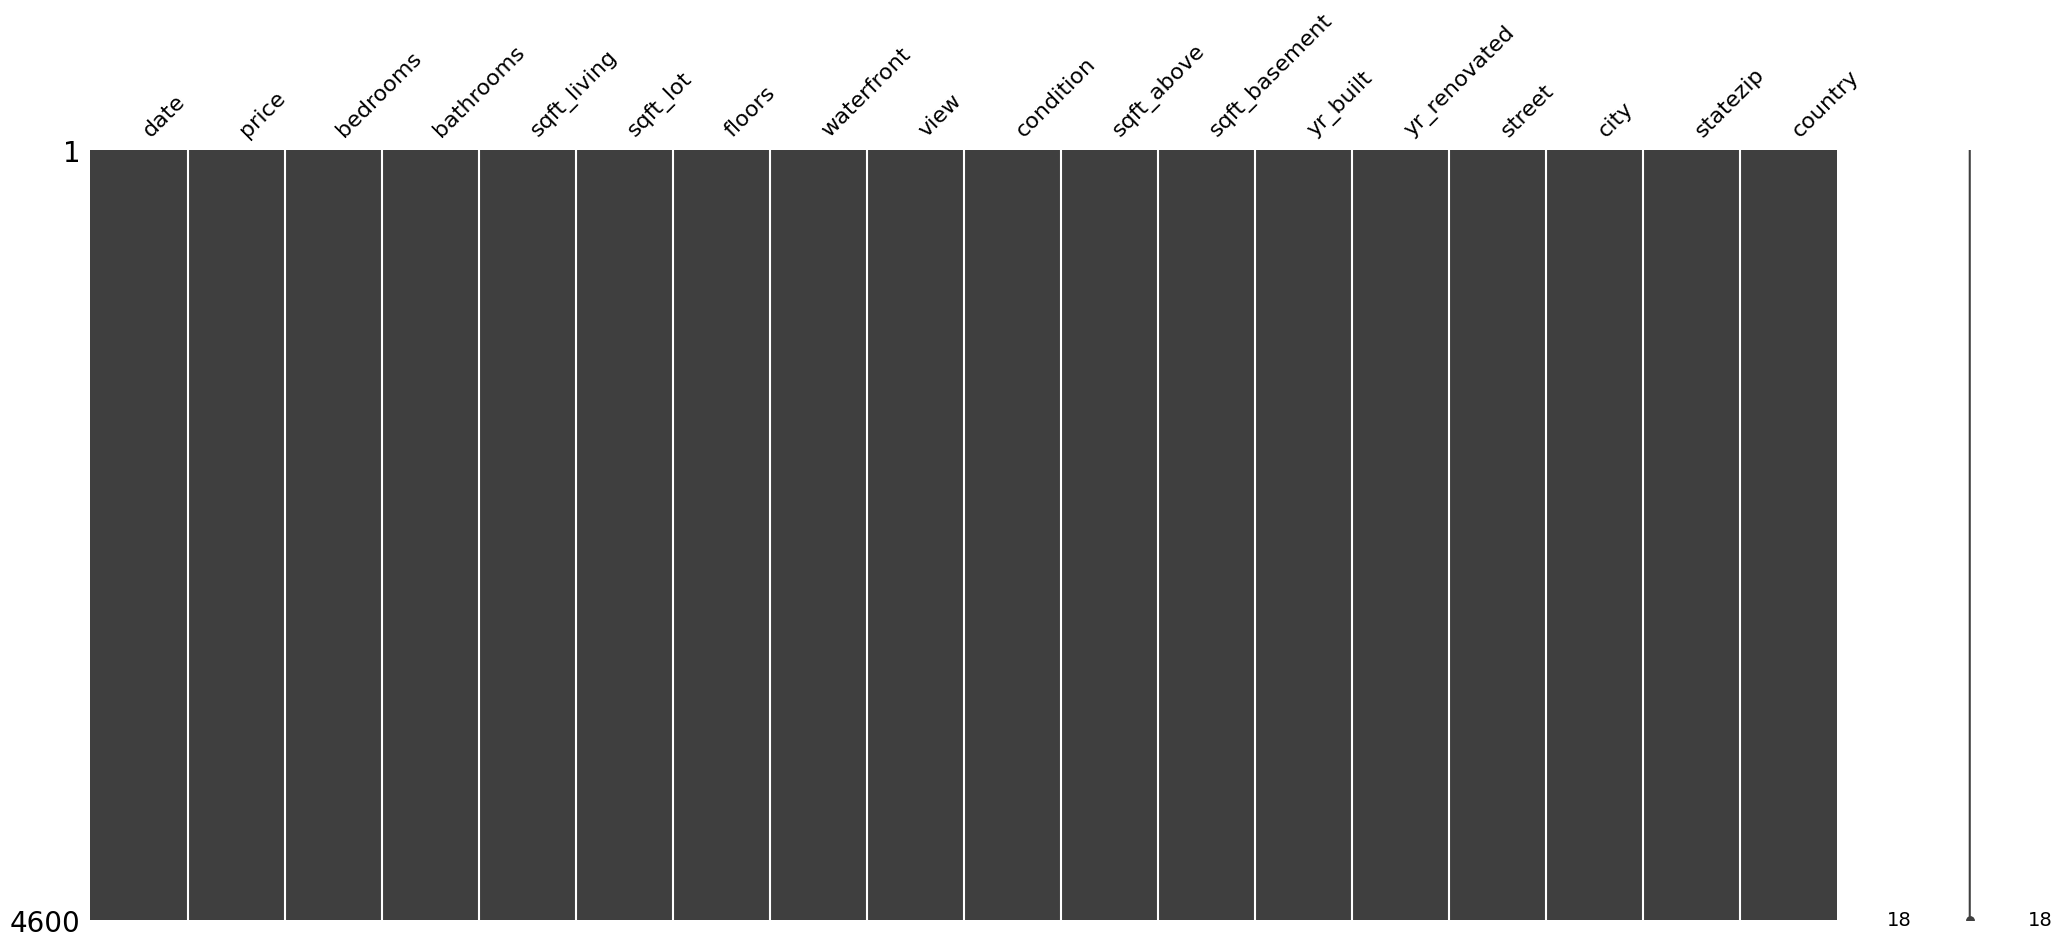

In [7]:
msn.matrix(df)

In [8]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [9]:
df.rename(columns={"yr_built":"year_built"},inplace=True)

In [10]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,year_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [11]:
df.groupby(by=["date"]).mean()

<ipython-input-11-ea5dec7f2de7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=["date"]).mean()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,year_built,yr_renovated
date,,,,,,,,,,,,,
2014-05-02,525538.475480,3.402985,2.138060,2102.835821,15640.477612,1.462687,0.000000,0.223881,3.447761,1819.850746,282.985075,1972.850746,891.208955
2014-05-03,466970.000000,3.000000,1.812500,1620.000000,8901.000000,1.250000,0.000000,0.000000,3.500000,1490.000000,130.000000,1978.750000,478.000000
2014-05-04,576690.000000,3.200000,2.400000,2508.000000,7563.000000,1.400000,0.000000,0.400000,3.400000,1878.000000,630.000000,1972.400000,1203.400000
2014-05-05,586067.724206,3.523810,2.193452,2257.845238,17966.309524,1.565476,0.000000,0.202381,3.440476,1887.607143,370.238095,1972.857143,806.428571
2014-05-06,517471.196787,3.493976,2.171687,2102.168675,12127.662651,1.457831,0.000000,0.120482,3.349398,1769.638554,332.530120,1969.108434,891.228916
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-06,709930.000000,3.000000,2.000000,2210.000000,5440.000000,1.166667,0.000000,1.333333,3.666667,1530.000000,680.000000,1948.000000,1334.333333
2014-07-07,527370.791165,3.301205,2.066265,2053.819277,16340.481928,1.620482,0.000000,0.144578,3.530120,1825.686747,228.132530,1968.734940,625.843373
2014-07-08,540899.275826,3.299213,2.200787,2225.692913,15754.590551,1.515748,0.015748,0.228346,3.346457,1932.149606,293.543307,1974.433071,752.236220


In [12]:
np.where(df.isna()==True)

(array([], dtype=int64), array([], dtype=int64))

In [13]:
df["city"].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [15]:
city_counts=df['city'].value_counts()

In [16]:
city_counts

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [17]:
dfdum=pd.get_dummies(df,columns=["city"],drop_first=True)

In [18]:
dfdum

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,0,1,0,0,0,0,0,0,0,0
4596,2014-07-09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4597,2014-07-09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4598,2014-07-10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,0,1,0,0,0,0,0,0,0,0


In [19]:
cor=df.corr()

<ipython-input-19-48d031cc9737>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


In [20]:
cor.style.background_gradient()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,year_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


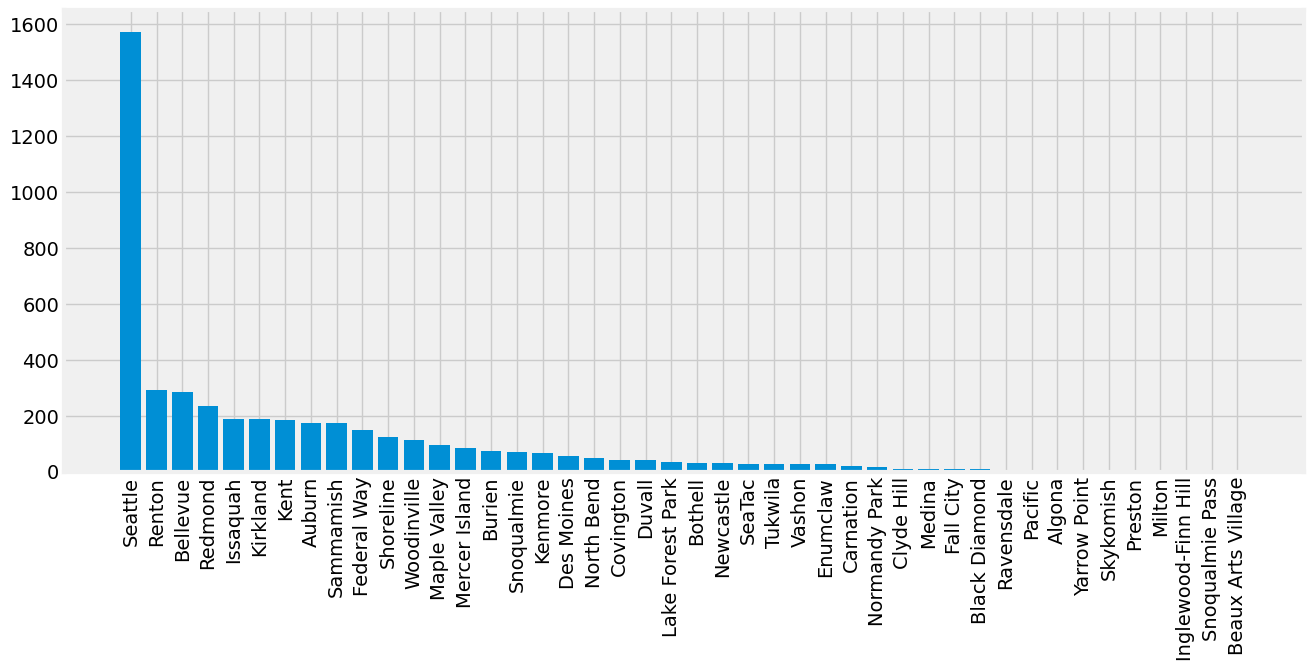

In [21]:
plt.figure(figsize=(16,6))
plt.style.use("fivethirtyeight")
plt.bar(city_counts.index,city_counts.values)
plt.xticks(rotation=90)
plt.show()

In [22]:
city10=city_counts[0:10]

In [23]:
city10

Seattle        1573
Renton          293
Bellevue        286
Redmond         235
Issaquah        187
Kirkland        187
Kent            185
Auburn          176
Sammamish       175
Federal Way     148
Name: city, dtype: int64

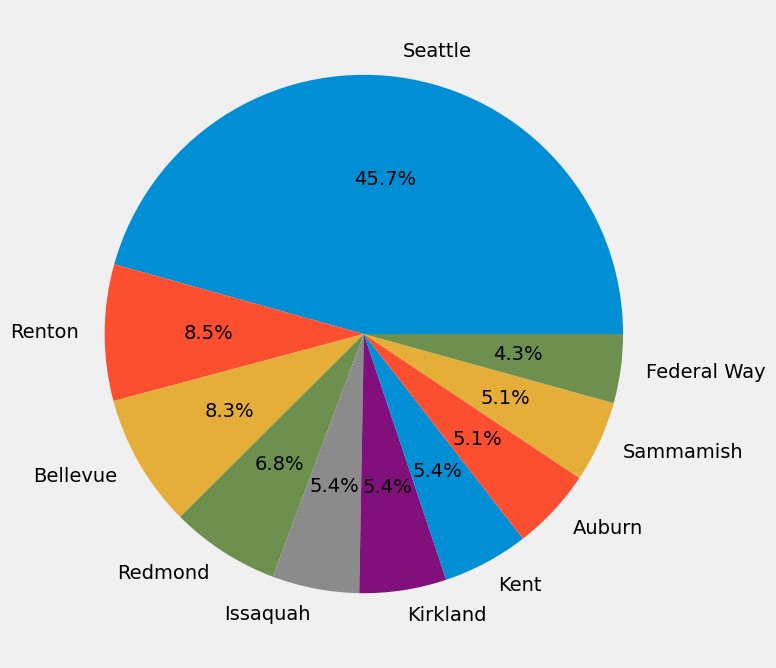

In [24]:
plt.figure(figsize=(8,8),edgecolor="white")
plt.style.use("fivethirtyeight")
plt.pie(city10.values,labels=city10.index,autopct="%1.1f%%")
plt.show()

In [25]:
def pie(column):
    data=df[column].value_counts()
    plt.figure(figsize=(6,6))
    plt.style.use("fivethirtyeight")
    plt.pie(data.values,labels=data.index,autopct="%1.1f%%")
    plt.title(column)
    plt.show()

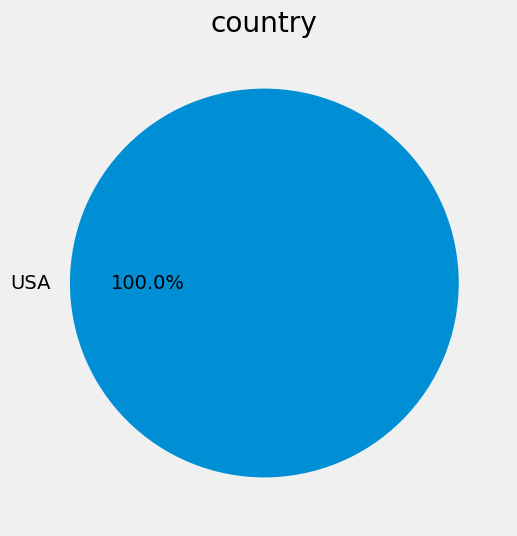

In [26]:
pie("country")

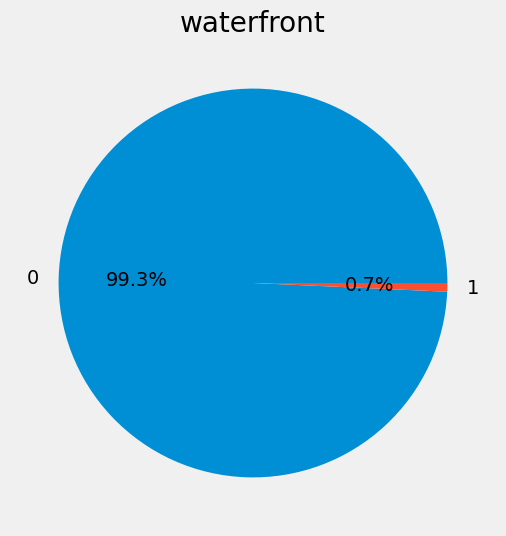

In [27]:
pie("waterfront")


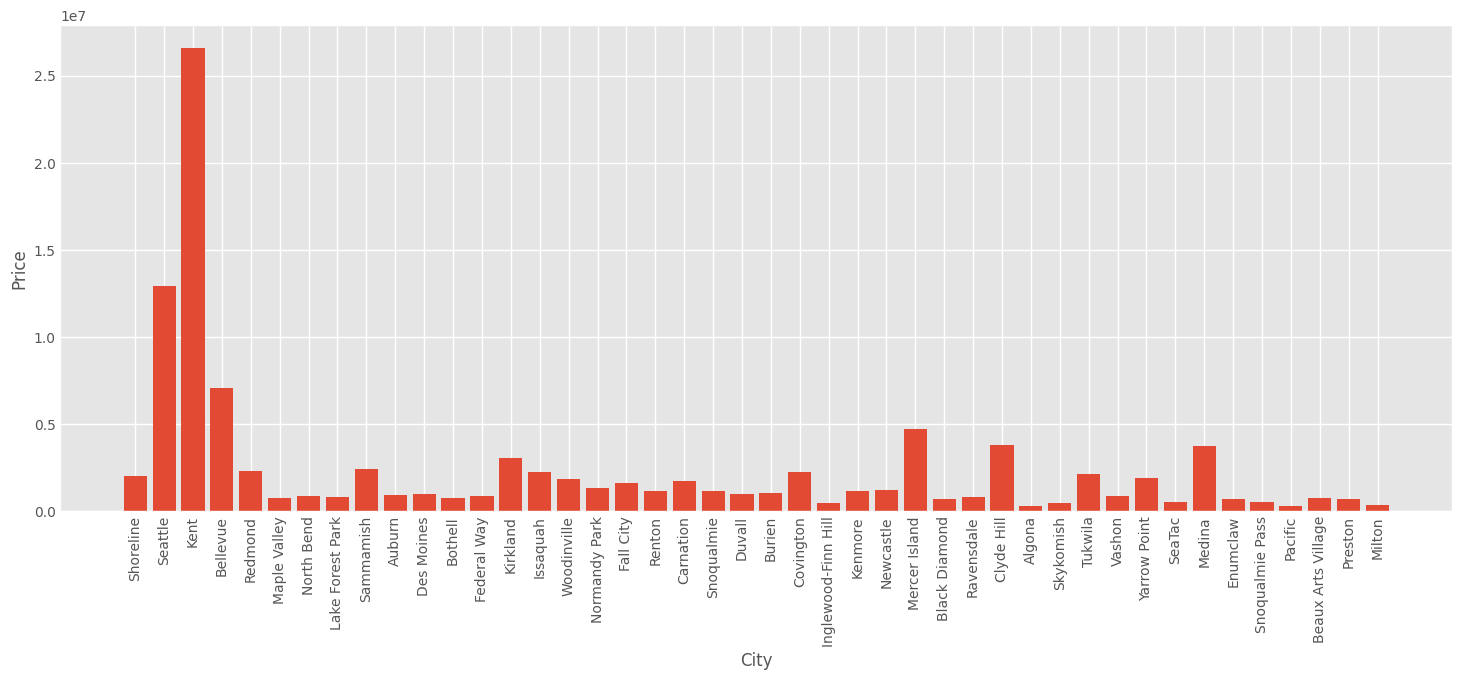

In [28]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.bar(df["city"],df["price"])
plt.xlabel("City")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

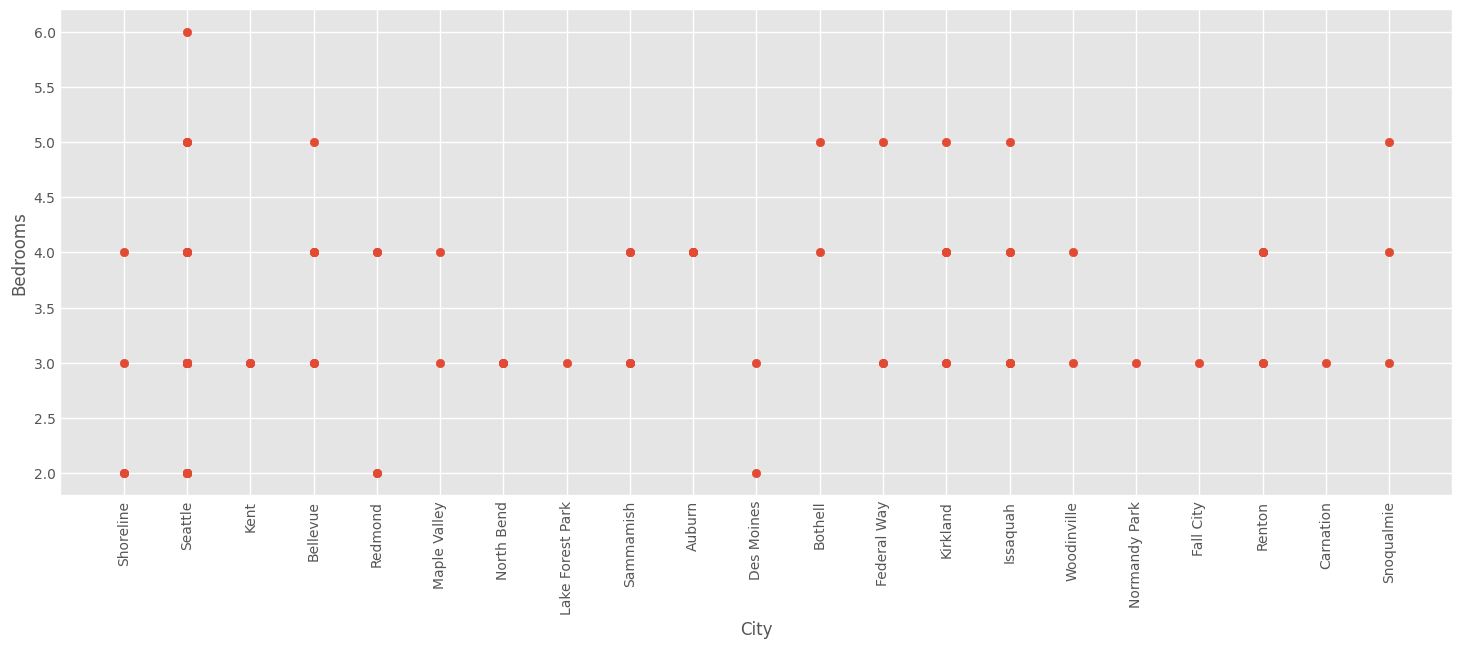

In [29]:
plt.figure(figsize=(16,6))
plt.scatter(df["city"].iloc[0:100],df["bedrooms"].iloc[0:100])
plt.xlabel("City")
plt.ylabel("Bedrooms")
plt.xticks(rotation=90)
plt.show()

In [30]:
bedrooms_counts=df["bedrooms"].value_counts()

In [31]:
bedrooms_counts

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

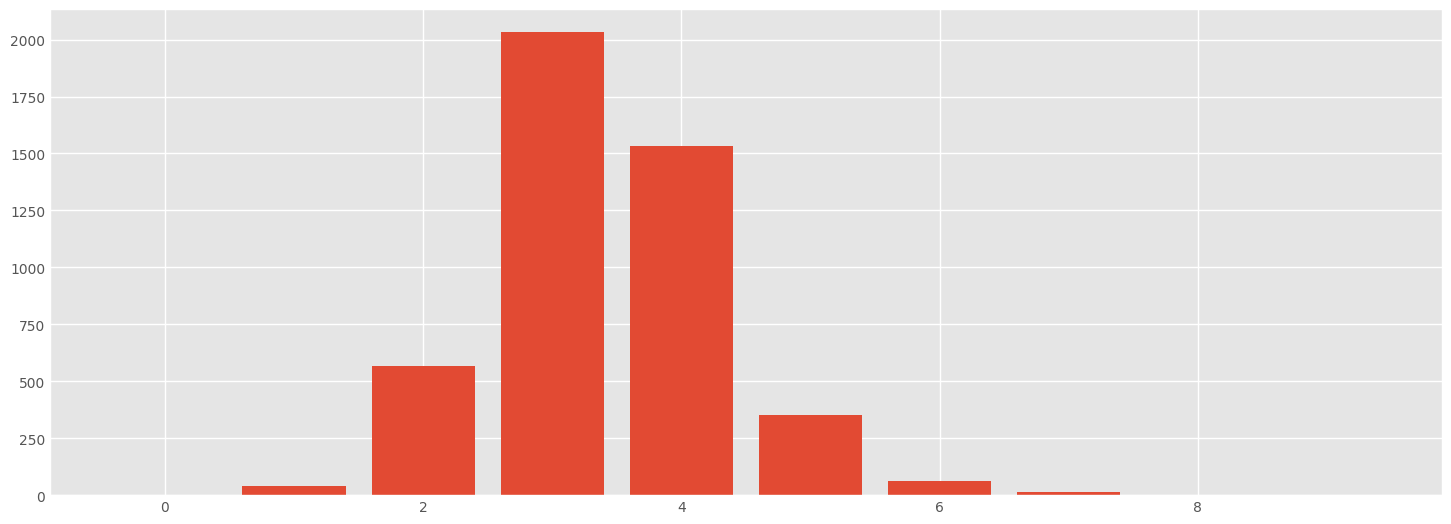

In [32]:
plt.figure(figsize=(16,6))
plt.style.use("ggplot")
plt.bar(bedrooms_counts.index,bedrooms_counts.values)
plt.show()

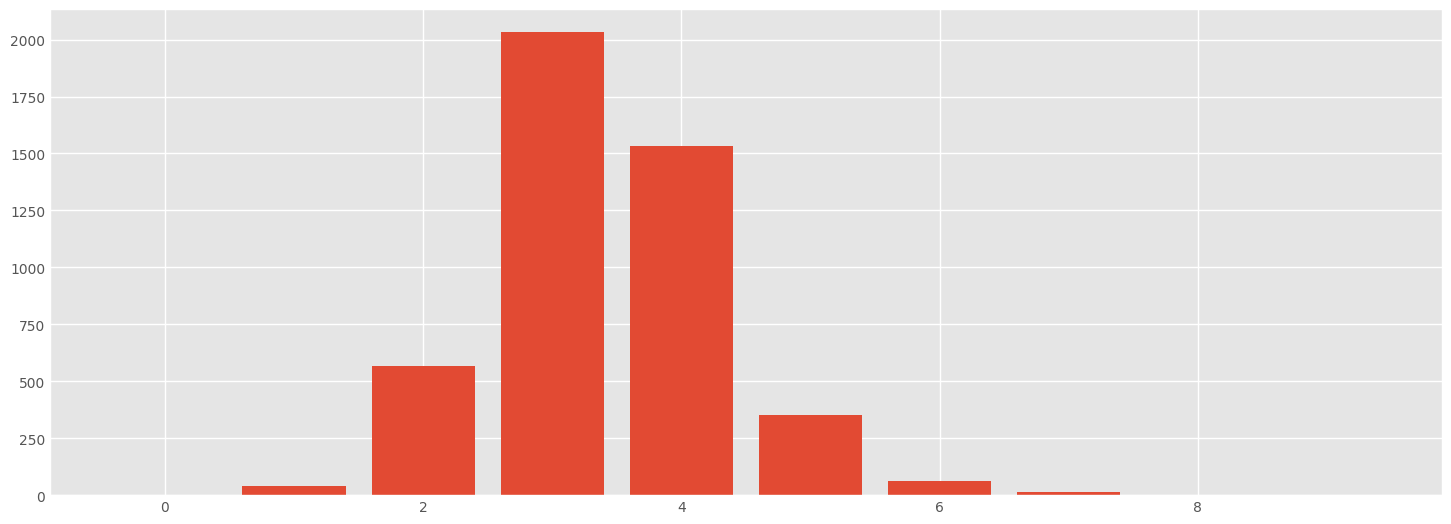

In [33]:
plt.figure(figsize=(16,6))
plt.style.use("ggplot")
plt.bar(bedrooms_counts.index,bedrooms_counts.values)
plt.show()

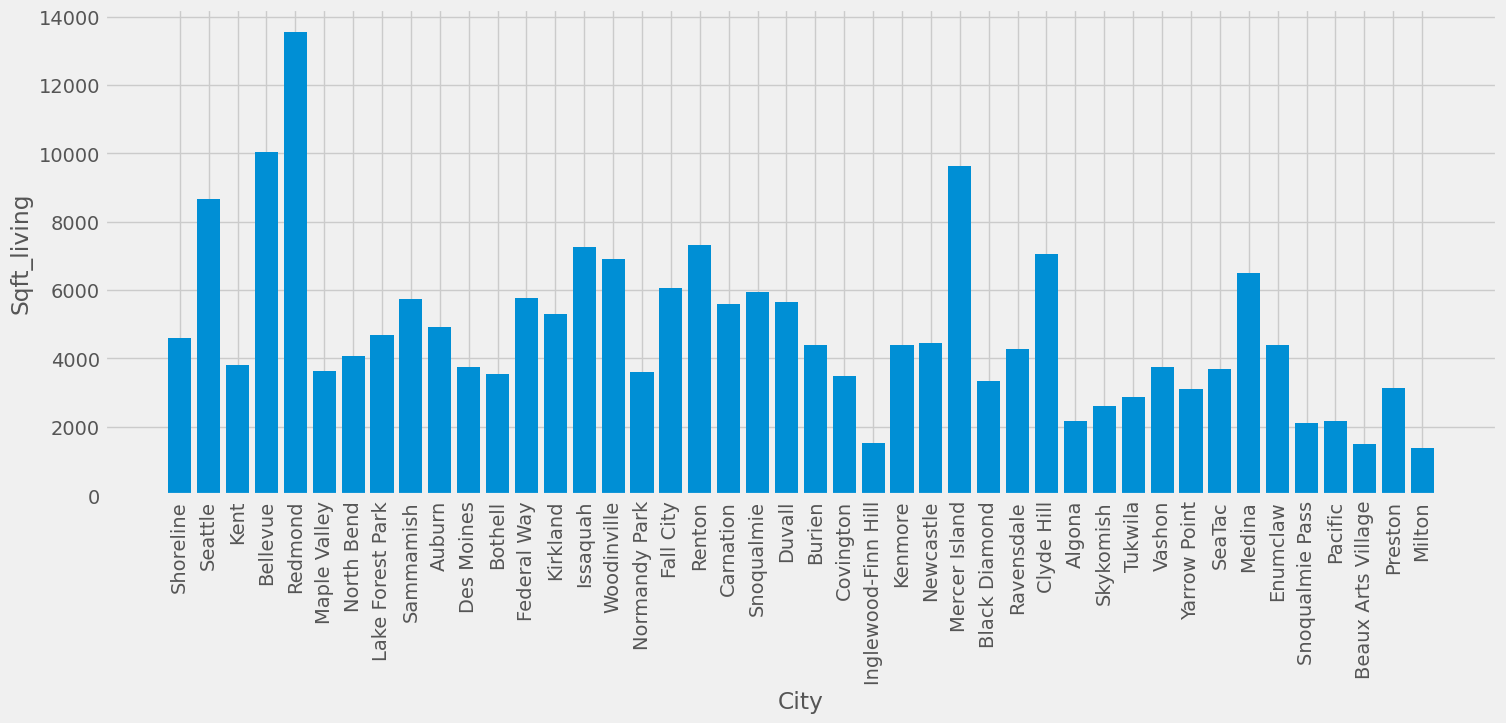

In [34]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,6))
plt.bar(df["city"],df["sqft_living"])
plt.xlabel("City")
plt.ylabel("Sqft_living")
plt.xticks(rotation=90)
plt.show()

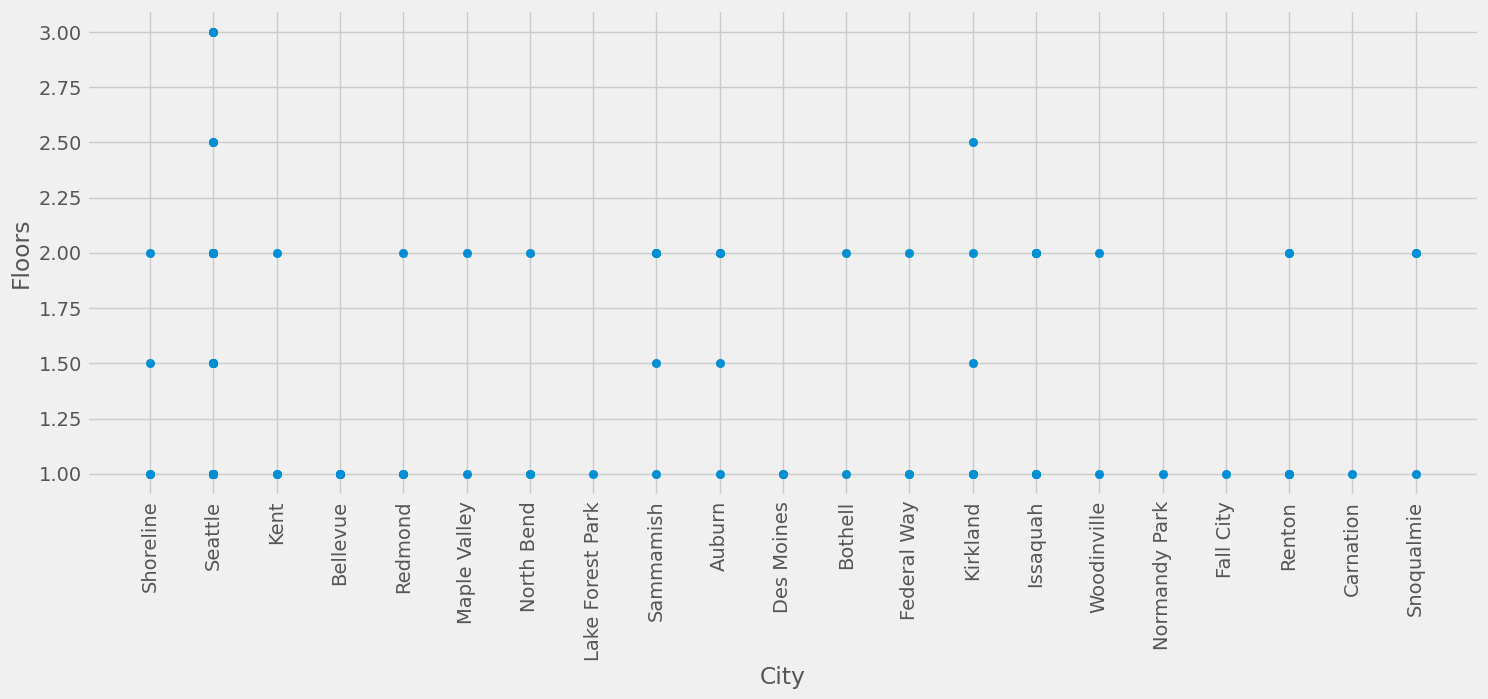

In [35]:
plt.figure(figsize=(16,6))
plt.scatter(df["city"].iloc[0:100],df["floors"].iloc[0:100])
plt.xlabel("City")
plt.ylabel("Floors")
plt.xticks(rotation=90)
plt.show()

In [36]:
df=df[["date","price"]]

In [37]:
df.columns=["ds","y"]

In [38]:
model=Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbhpi12vw/vpami934.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbhpi12vw/01d3_wrl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88269', 'data', 'file=/tmp/tmpbhpi12vw/vpami934.json', 'init=/tmp/tmpbhpi12vw/01d3_wrl.json', 'output', 'file=/tmp/tmpbhpi12vw/prophet_model_za2v25s/prophet_model-20230815154831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:48:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:48:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [39]:
gelecek=model.make_future_dataframe(periods=100)

In [40]:
tahmin=model.predict(gelecek)

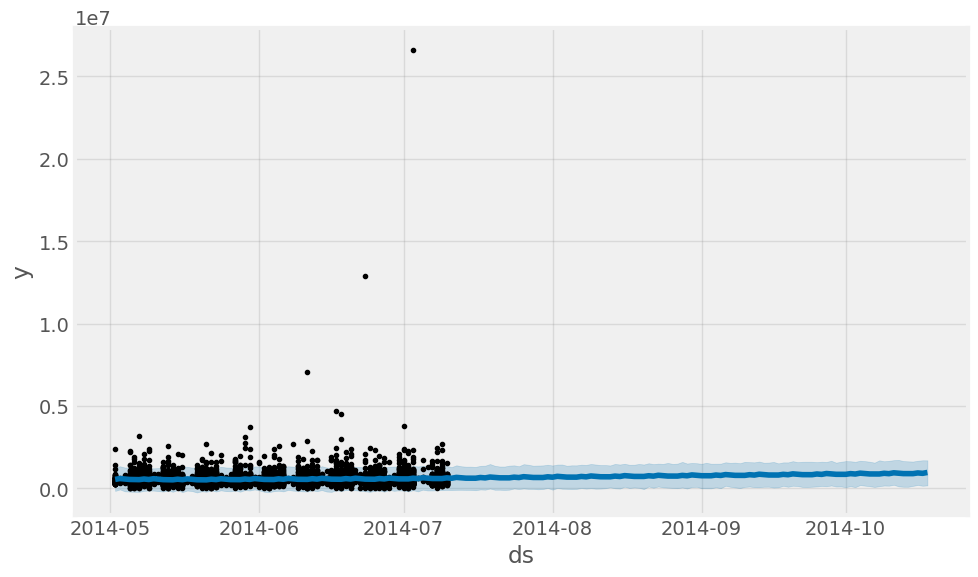

In [44]:
model.plot(tahmin);

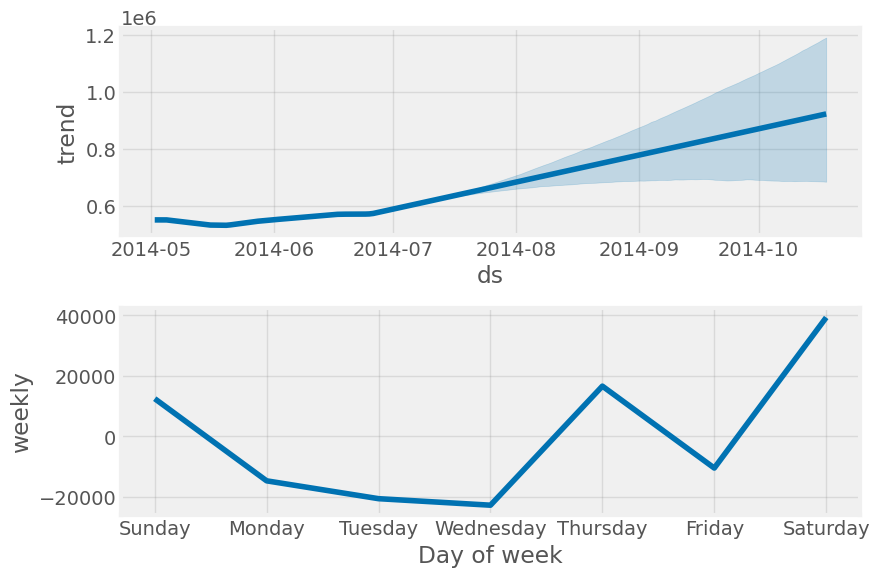

In [42]:
model.plot_components(tahmin);